In [ ]:
##########################################################################

# I acknowledge the use of ChatGPT and AI Tools in Helping me Code and Debug the work in this File

##########################################################################




In [22]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt


# file_path = "/Users/marcosmaldacena/Downloads/Thesis Data/2024_2025_start.csv"

# df = pd.read_csv(file_path)

# file_path = "/scratch/network/mm4846/Thesis Data/Emploiyees_Yearly.csv"

# df2 = pd.read_csv(file_path)

# # file_path = ("/Users/marcosmaldacena/Downloads/Thesis Data/2006_2025_03_02_v9.csv")

# # df_combined = pd.read_csv(file_path)


# # path = ("/Users/marcosmaldacena/Downloads/Thesis Data/df_combined_neg.csv")

# # df_neg = pd.read_csv(path, usecols = ['ticker', 'date', 'assigned_quarter', 'question_answer_pairs', 
# #                                       'questions_only', 'negative_questions', 'num_negative_questions'])


# path =  "/scratch/network/mm4846/Thesis Data/transcripts_2006_2025_03_18.csv"

# df = pd.read_csv(path)

# path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_enhanced_other_qs.csv"

# df_others = pd.read_csv(path)

# file_path = "/scratch/network/mm4846/final_returns.csv"

# df = pd.read_csv(file_path)


# path =  "/scratch/network/mm4846/vectors_v1_3_20.csv"

# df_vectors = pd.read_csv(path)


# df.to_csv(file_path)

In [2]:
df_vectors.columns

Index(['Unnamed: 0', 'ticker', 'date', 'assigned_quarter', 'quarter', 'year',
       'presentation_vector', 'qna_question_vector',
       'presentation_recurring_vector', 'presentation_episodic_vector',
       'presentation_less_frequent_vector', 'qna_question_recurring_vector',
       'qna_question_episodic_vector', 'qna_question_less_frequent_vector',
       'recurring_sum', 'episodic_sum', 'less_frequent_sum', 'recurring_count',
       'episodic_count', 'less_frequent_count', 'recurring_sum_qna',
       'episodic_sum_qna', 'less_frequent_sum_qna', 'recurring_count_qna',
       'episodic_count_qna', 'less_frequent_count_qna', 'sector_name_mapped',
       'group_name_mapped', 'ind_name_mapped', 'subind_name_mapped'],
      dtype='object')

In [24]:
# df['ticker'] = df['Ticker']

In [23]:
# df2['ticker'] = df2['tic']
# df2_subset = df2[['ticker', 'gind', 'gsector', 'ggroup', 'gsubind']]

# df2_unique = df2.drop_duplicates(subset='ticker').set_index('ticker')

# # Then use 'map' for each column you want to bring into df:
# df['gind']    = df['ticker'].map(df2_unique['gind'])
# df['gsector'] = df['ticker'].map(df2_unique['gsector'])
# df['ggroup']  = df['ticker'].map(df2_unique['ggroup'])  
# df['gsubind'] = df['ticker'].map(df2_unique['gsubind'])

# df["sector_name_mapped"] = df["gsector"].map(sector_map)
# df["group_name_mapped"]  = df["ggroup"].map(industry_group_map)
# df["ind_name_mapped"]    = df["gind"].map(industry_map)
# df["subind_name_mapped"] = df["gsubind"].map(subindustry_map)
# df = df.drop(columns = ["gind", "gsector", "ggroup", "gsubind"])

# print(df)



In [5]:
df_vectors[df_vectors['ticker'] == 'D']

,Unnamed: 0,ticker,date,assigned_quarter,quarter,year,presentation_vector,qna_question_vector,presentation_recurring_vector,presentation_episodic_vector,...,recurring_sum_qna,episodic_sum_qna,less_frequent_sum_qna,recurring_count_qna,episodic_count_qna,less_frequent_count_qna,sector_name_mapped,group_name_mapped,ind_name_mapped,subind_name_mapped
656,656,D,2006-01-31 07:35:04,2005Q4,4,2005,"[0, 1, 0, 1, 0, 0, 0, 3, 3, 0, 0, 1, 31, 3, 1,...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, ...","[3, 1, 3, 31, 3, 2, 0, 0]","[1, 3, 0, 0, 0, 0, 0, 0, 0, 1]",...,5,0,2,3,0,1,Utilities,Utilities,Multi-Utilities,Multi-Utilities
657,657,D,2006-05-03 16:19:48,2006Q1,1,2006,"[0, 0, 0, 1, 0, 0, 0, 5, 0, 1, 0, 0, 6, 1, 0, ...","[0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, ...","[0, 0, 5, 6, 7, 5, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]",...,8,4,0,4,2,0,Utilities,Utilities,Multi-Utilities,Multi-Utilities
658,658,D,2006-11-01 16:22:33,2006Q3,3,2006,"[0, 0, 0, 3, 0, 0, 0, 5, 5, 0, 0, 0, 5, 2, 0, ...","[0, 0, 0, 2, 0, 0, 0, 8, 0, 0, 0, 0, 2, 2, 0, ...","[5, 0, 5, 5, 5, 1, 2, 0]","[0, 2, 0, 0, 0, 0, 0, 0, 0, 3]",...,11,4,1,3,2,1,Utilities,Utilities,Multi-Utilities,Multi-Utilities
659,659,D,2007-01-31 15:26:18,2006Q4,4,2006,"[0, 0, 5, 2, 0, 0, 0, 7, 3, 0, 0, 0, 12, 2, 0,...","[0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, ...","[3, 0, 7, 12, 7, 2, 10, 0]","[0, 2, 0, 0, 0, 0, 0, 0, 5, 2]",...,9,0,1,5,0,1,Utilities,Utilities,Multi-Utilities,Multi-Utilities
660,660,D,2007-08-01 16:35:24,2007Q2,2,2007,"[0, 3, 1, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, ...","[0, 3, 7, 0, 7, 1, 5, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,5,2,0,4,1,0,Utilities,Utilities,Multi-Utilities,Multi-Utilities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29943,29943,D,2023-05-05 13:09:08,2023Q1,1,2023,"[0, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 13, 1, 1,...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 3, 13, 1, 2, 13, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 2, 0]",...,1,0,0,1,0,0,Utilities,Utilities,Multi-Utilities,Multi-Utilities
29944,29944,D,2023-08-04 12:32:09,2023Q2,2,2023,"[0, 1, 1, 0, 0, 0, 0, 9, 1, 0, 0, 0, 6, 2, 3, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 9, 6, 2, 1, 9, 2]","[3, 2, 0, 0, 0, 0, 0, 0, 1, 0]",...,1,0,0,1,0,0,Utilities,Utilities,Multi-Utilities,Multi-Utilities
29945,29945,D,2023-11-03 11:58:06,2023Q3,3,2023,"[0, 1, 5, 0, 0, 1, 0, 21, 6, 1, 0, 4, 6, 0, 10...","[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...","[6, 1, 21, 6, 4, 2, 19, 1]","[10, 0, 0, 0, 0, 0, 2, 1, 5, 0]",...,7,1,0,6,1,0,Utilities,Utilities,Multi-Utilities,Multi-Utilities
29946,29946,D,2024-02-22 14:55:09,2023Q4,4,2023,"[0, 1, 2, 0, 0, 0, 0, 9, 5, 1, 0, 2, 8, 1, 2, ...","[0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, ...","[5, 1, 9, 8, 0, 1, 9, 6]","[2, 1, 0, 0, 0, 0, 0, 0, 2, 0]",...,4,0,0,2,0,0,Utilities,Utilities,Multi-Utilities,Multi-Utilities


In [16]:
import numpy as np
import pandas as pd
# Ensure Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create 'quarter' column in the format YYYYQ#
df["quarter"] = df["Date"].dt.to_period("Q").astype(str).str.replace("-", "Q")

def average_pairwise_correlation_per_quarter_by_sector(df, return_type="Daily Log Return"):
    """
    Computes the average pairwise correlation of stock returns for each sector in each quarter.

    Parameters:
    - df (pd.DataFrame): DataFrame containing stock returns, sector information, and quarter.
    - return_type (str): "Daily Log Return" or "Weekly Log Return".

    Returns:
    - pd.DataFrame: DataFrame with 'quarter', 'sector', and 'avg_pairwise_correlation'.
    """
    results = []
    
    for (quarter, sector), df_quarter_sector in df.groupby(["quarter", "sector_name_mapped"]):
        # Pivot to have tickers as columns and drop columns with all NaN values
        df_pivot = df_quarter_sector.pivot(index="Date", columns="Ticker", values=return_type).dropna(axis=1, how="all")
        
        if df_pivot.shape[1] > 1:  # Only calculate correlation if at least 2 stocks exist
            correlation_matrix = df_pivot.corr()  # Compute correlation matrix
            np.fill_diagonal(correlation_matrix.values, np.nan)  # Remove self-correlation
            avg_corr = np.nanmean(correlation_matrix.values)  # Compute mean of non-diagonal elements
            results.append({"quarter": quarter, "sector": sector, "avg_pairwise_correlation": avg_corr})
    
    return pd.DataFrame(results)

# Compute quarterly pairwise correlation by sector
df_quarterly_correlation_by_sector = average_pairwise_correlation_per_quarter_by_sector(df, return_type="Daily Log Return")


In [42]:
# df_industrials = df_quarterly_correlation_by_sector[df_quarterly_correlation_by_sector['sector'] == 'Industrials']
df_vectors.columns

Index(['Unnamed: 0', 'ticker', 'date', 'assigned_quarter', 'quarter', 'year',
       'presentation_vector', 'qna_question_vector',
       'presentation_recurring_vector', 'presentation_episodic_vector',
       'presentation_less_frequent_vector', 'qna_question_recurring_vector',
       'qna_question_episodic_vector', 'qna_question_less_frequent_vector',
       'recurring_sum', 'episodic_sum', 'less_frequent_sum', 'recurring_count',
       'episodic_count', 'less_frequent_count', 'recurring_sum_qna',
       'episodic_sum_qna', 'less_frequent_sum_qna', 'recurring_count_qna',
       'episodic_count_qna', 'less_frequent_count_qna', 'sector_name_mapped',
       'group_name_mapped', 'ind_name_mapped', 'subind_name_mapped'],
      dtype='object')

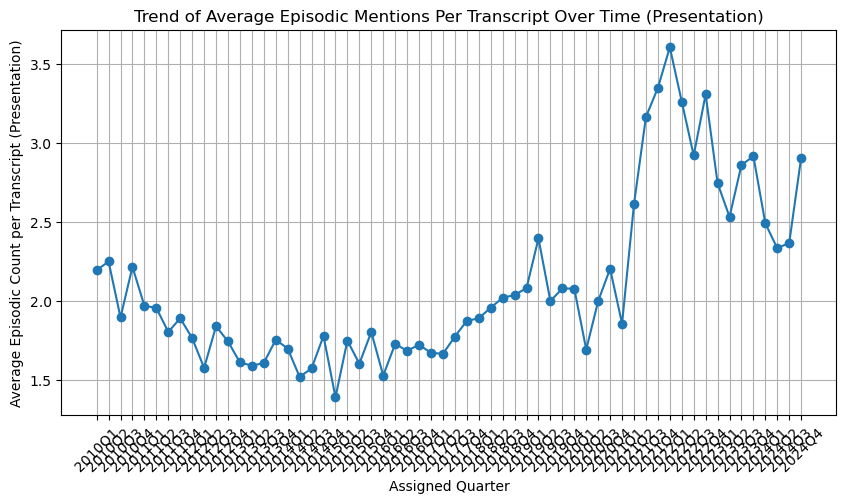

In [38]:
import matplotlib.pyplot as plt

def plot_trend(df, mention_type="episodic", section="presentation", sector=None, start_year=None, end_year=None):
    """
    Plots the trend of average mentions per transcript over time, 
    with optional filtering by mention type, section, sector, and year range.

    Parameters:
    - df (pd.DataFrame): The input dataframe.
    - mention_type (str): Choose from "episodic", "recurring", or "less_frequent".
    - section (str): Choose from "presentation" or "qna_question".
    - sector (str, optional): Filter for a specific sector (uses 'sector_name_mapped' column).
    - start_year (int, optional): Start year for filtering.
    - end_year (int, optional): End year for filtering.
    
    Returns:
    - None (displays the plot).
    """
    
    # Construct the correct column name based on the inputs
    column_name = f"{mention_type}_count" if section == "presentation" else f"{mention_type}_count_qna"
    
    if column_name not in df.columns:
        raise ValueError(f"Invalid column '{column_name}'. Check 'mention_type' and 'section' inputs.")

    # Create a filtered copy of the dataframe
    filtered_df = df.copy()

    # Apply sector filter if provided and if column exists
    if sector:
        if "sector_name_mapped" not in df.columns:
            raise ValueError("The column 'sector_name_mapped' does not exist in the dataset.")
        if sector not in df["sector_name_mapped"].unique():
            raise ValueError(f"Sector '{sector}' not found in 'sector_name_mapped' column.")
        
        filtered_df = filtered_df[filtered_df["sector_name_mapped"] == sector]

    # Apply year range filter if provided
    if start_year or end_year:
        if "assigned_quarter" not in df.columns:
            raise ValueError("The column 'assigned_quarter' does not exist in the dataset.")
        
        filtered_df["year"] = filtered_df["assigned_quarter"].astype(str).str[:4].astype(int)  # Extract year from quarter
        
        if start_year:
            filtered_df = filtered_df[filtered_df["year"] >= start_year]
        if end_year:
            filtered_df = filtered_df[filtered_df["year"] <= end_year]

    # Compute the average count per transcript
    avg_mentions_per_transcript = filtered_df.groupby("assigned_quarter")[column_name].mean()

    # Ensure there is data to plot
    if avg_mentions_per_transcript.empty:
        print(f"No data available for the given filters: mention_type={mention_type}, section={section}, sector={sector}, years={start_year}-{end_year}")
        return

    # Plot the trend over time
    plt.figure(figsize=(10, 5))
    plt.plot(avg_mentions_per_transcript.index, avg_mentions_per_transcript.values, marker='o', linestyle='-')
    plt.xlabel("Assigned Quarter")
    plt.ylabel(f"Average {mention_type.capitalize()} Count per Transcript ({section.replace('_', ' ').capitalize()})")
    plt.title(f"Trend of Average {mention_type.capitalize()} Mentions Per Transcript Over Time ({section.replace('_', ' ').capitalize()})")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


plot_trend(df_vectors, mention_type="episodic", section="presentation", sector="Consumer Discretionary", start_year=2010, end_year=2025)
# plot_trend(df_vectors, mention_type="recurring", section="presentation", sector="Industrials", start_year=2011, end_year=2025)


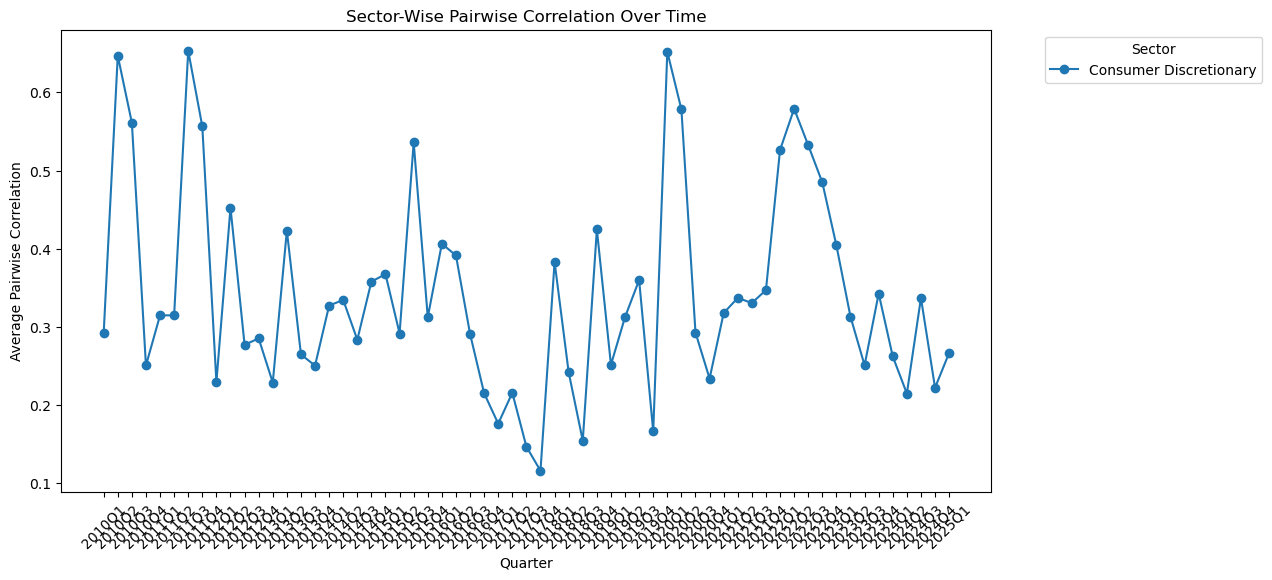

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_avg_intra_sector_cosine(df, vector_col="episodic_vector", sector=None, start_year=None, end_year=None):
    """
    Plots average cosine similarity within a sector over time by computing
    the mean pairwise cosine similarity of vectors in each (quarter, sector) group.

    Parameters:
    - df (pd.DataFrame): DataFrame containing at least 'assigned_quarter', 'sector_name_mapped', and vector_col.
    - vector_col (str): Column containing vector embeddings (e.g., 'episodic_vector').
    - sector (str): The sector to filter and plot.
    - start_year (int, optional): Start year for filtering.
    - end_year (int, optional): End year for filtering.
    """
    # Filter out missing vectors
    df = df[df[vector_col].notna()].copy()

    # Optionally filter by year
    df["year"] = df["assigned_quarter"].astype(str).str[:4].astype(int)
    if start_year:
        df = df[df["year"] >= start_year]
    if end_year:
        df = df[df["year"] <= end_year]

    # Ensure vectors are numpy arrays
    df[vector_col] = df[vector_col].apply(lambda x: np.array(x))

    # Group by quarter and sector
    grouped = df.groupby(["assigned_quarter", "sector_name_mapped"])

    # Compute average cosine similarity within each group
    records = []
    for (quarter, sec), group in grouped:
        if len(group) < 2:
            continue  # Need at least 2 to compute similarity
        vectors = np.stack(group[vector_col].values)
        sim_matrix = cosine_similarity(vectors)
        # Take upper triangle (excluding diagonal) to avoid redundancy
        tri_indices = np.triu_indices_from(sim_matrix, k=1)
        avg_sim = sim_matrix[tri_indices].mean()
        records.append({
            "assigned_quarter": quarter,
            "sector_name_mapped": sec,
            "avg_cosine_similarity": avg_sim
        })

    sim_df = pd.DataFrame(records)

    # Filter to desired sector
    if sector not in sim_df["sector_name_mapped"].unique():
        print(f"No data found for sector '{sector}' in available records.")
        return
    
    sector_df = sim_df[sim_df["sector_name_mapped"] == sector].sort_values("assigned_quarter")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(sector_df["assigned_quarter"], sector_df["avg_cosine_similarity"], marker='o', linestyle='-')
    plt.xlabel("Assigned Quarter")
    plt.ylabel("Avg Intra-Sector Cosine Similarity")
    plt.title(f"Average Cosine Similarity of {vector_col} in '{sector}' Sector Over Time")
    plt.xticks(rotation=45)
    # plt.grid(True)
    # plt.show()




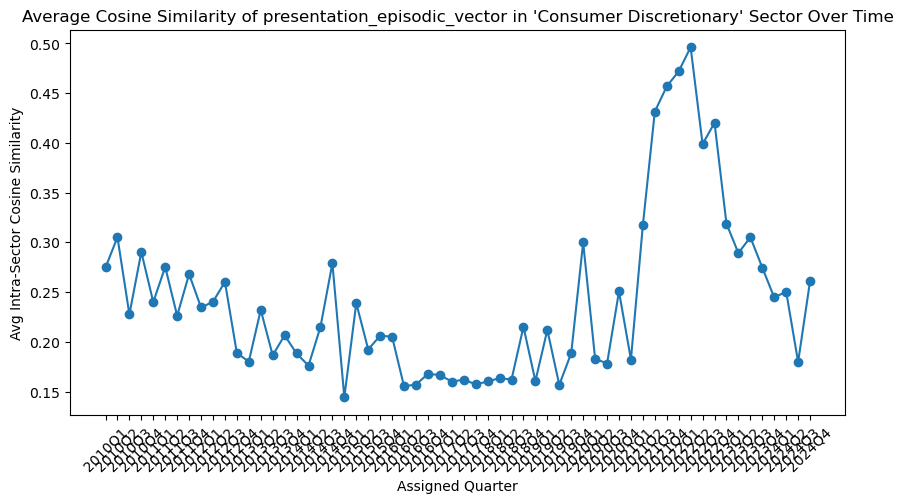

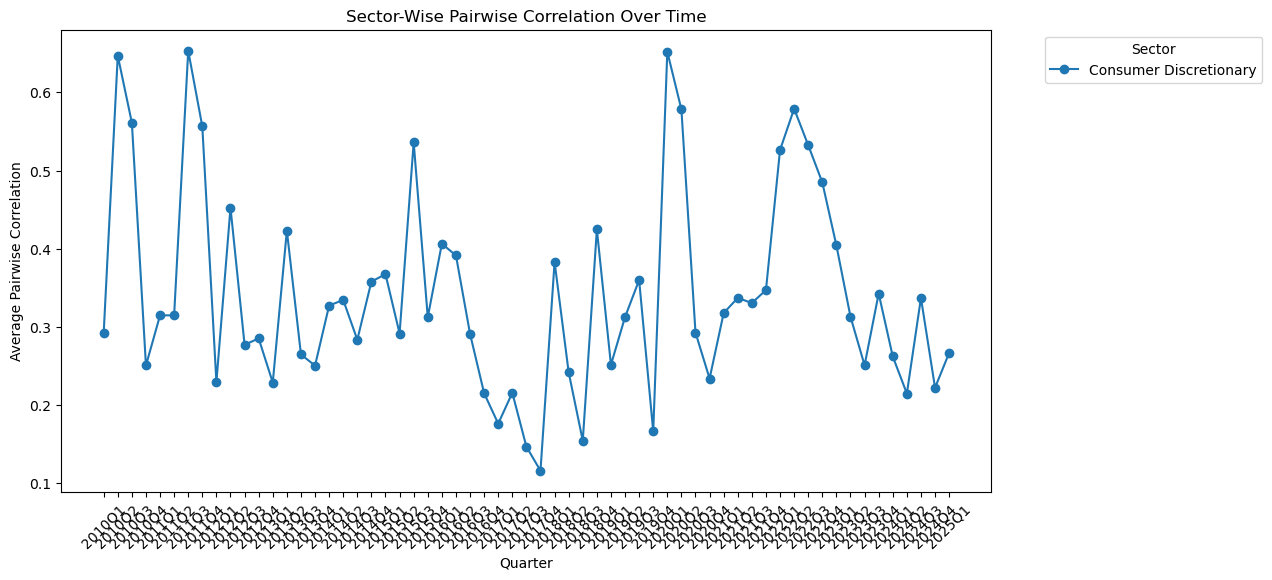

In [51]:
plot_avg_intra_sector_cosine(
    df_vectors,
    vector_col="presentation_episodic_vector",
    sector="Consumer Discretionary",
    start_year=2010,
    end_year=2025
)

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Get unique sectors
# sectors = df_quarterly_correlation_by_sector["sector"].unique()
sectors = ['Consumer Discretionary']
# Plot each sector's correlation trend over time
for sector in sectors:
    sector_data = df_quarterly_correlation_by_sector[df_quarterly_correlation_by_sector["sector"] == sector]
    plt.plot(sector_data["quarter"], sector_data["avg_pairwise_correlation"], marker='o', linestyle='-', label=sector)

# Customize plot
plt.xlabel("Quarter")
plt.ylabel("Average Pairwise Correlation")
plt.title("Sector-Wise Pairwise Correlation Over Time")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)


# Show plot
plt.show()

In [45]:
import ast
df_vectors["presentation_episodic_vector"] = df_vectors["presentation_episodic_vector"].apply(ast.literal_eval)


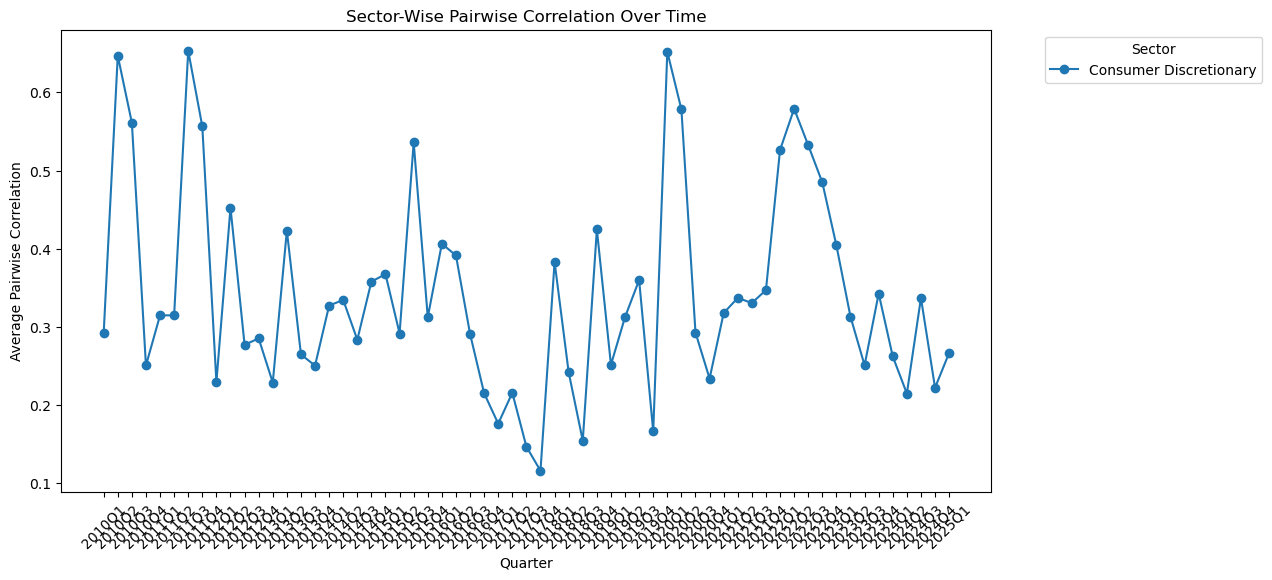

In [33]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Get unique sectors
# sectors = df_quarterly_correlation_by_sector["sector"].unique()
sectors = ['Consumer Discretionary']
# Plot each sector's correlation trend over time
for sector in sectors:
    sector_data = df_quarterly_correlation_by_sector[df_quarterly_correlation_by_sector["sector"] == sector]
    plt.plot(sector_data["quarter"], sector_data["avg_pairwise_correlation"], marker='o', linestyle='-', label=sector)

# Customize plot
plt.xlabel("Quarter")
plt.ylabel("Average Pairwise Correlation")
plt.title("Sector-Wise Pairwise Correlation Over Time")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)


# Show plot
plt.show()

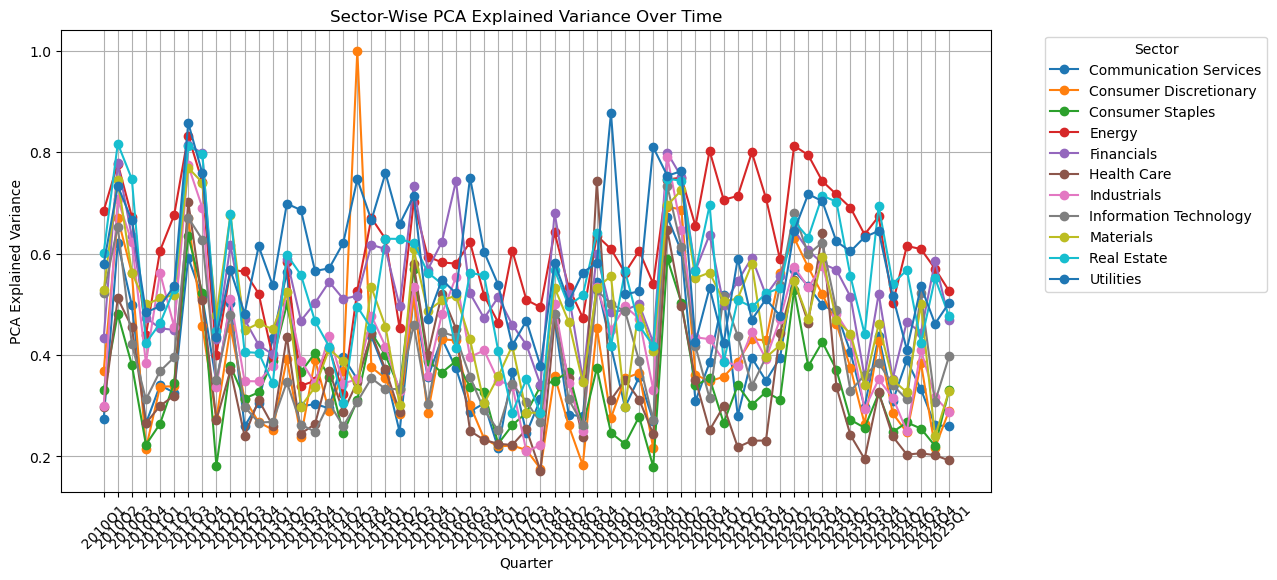

In [28]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Function to calculate PCA explained variance per quarter per sector
def pca_explained_variance_per_quarter_by_sector(df, return_type="Daily Log Return"):
    results = []
    
    for (quarter, sector), df_quarter_sector in df.groupby(["quarter", "sector_name_mapped"]):
        df_pivot = df_quarter_sector.pivot(index="Date", columns="Ticker", values=return_type).dropna(axis=1, how="all")
        
        if df_pivot.shape[1] > 1:
            pca = PCA(n_components=1)
            pca.fit(df_pivot.dropna())
            explained_variance = pca.explained_variance_ratio_[0]
            results.append({"quarter": quarter, "sector": sector, "pca_explained_variance": explained_variance})
    
    return pd.DataFrame(results)

# Compute PCA explained variance per quarter per sector
df_pca_explained_variance_by_sector = pca_explained_variance_per_quarter_by_sector(df, return_type="Daily Log Return")
# Plot results for PCA explained variance
plt.figure(figsize=(12, 6))
for sector in df_pca_explained_variance_by_sector["sector"].unique():
    sector_data = df_pca_explained_variance_by_sector[df_pca_explained_variance_by_sector["sector"] == sector]
    plt.plot(sector_data["quarter"], sector_data["pca_explained_variance"], marker='o', linestyle='-', label=sector)

plt.xlabel("Quarter")
plt.ylabel("PCA Explained Variance")
plt.title("Sector-Wise PCA Explained Variance Over Time")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()


Processing: Quarter=2010Q1, Sector=Communication Services, Rows=895
  → Avg Beta for Communication Services in 2010Q1: 1.000
Processing: Quarter=2010Q1, Sector=Consumer Discretionary, Rows=2408
  → Avg Beta for Consumer Discretionary in 2010Q1: 1.000
Processing: Quarter=2010Q1, Sector=Consumer Staples, Rows=1904
  → Avg Beta for Consumer Staples in 2010Q1: 1.000
Processing: Quarter=2010Q1, Sector=Energy, Rows=896
  → Avg Beta for Energy in 2010Q1: 1.000
Processing: Quarter=2010Q1, Sector=Financials, Rows=3640
  → Avg Beta for Financials in 2010Q1: 1.001
Processing: Quarter=2010Q1, Sector=Health Care, Rows=3024
  → Avg Beta for Health Care in 2010Q1: 1.000
Processing: Quarter=2010Q1, Sector=Industrials, Rows=3445
  → Avg Beta for Industrials in 2010Q1: 0.992
Processing: Quarter=2010Q1, Sector=Information Technology, Rows=3080
  → Avg Beta for Information Technology in 2010Q1: 1.000
Processing: Quarter=2010Q1, Sector=Materials, Rows=1288
  → Avg Beta for Materials in 2010Q1: 1.000
Proces

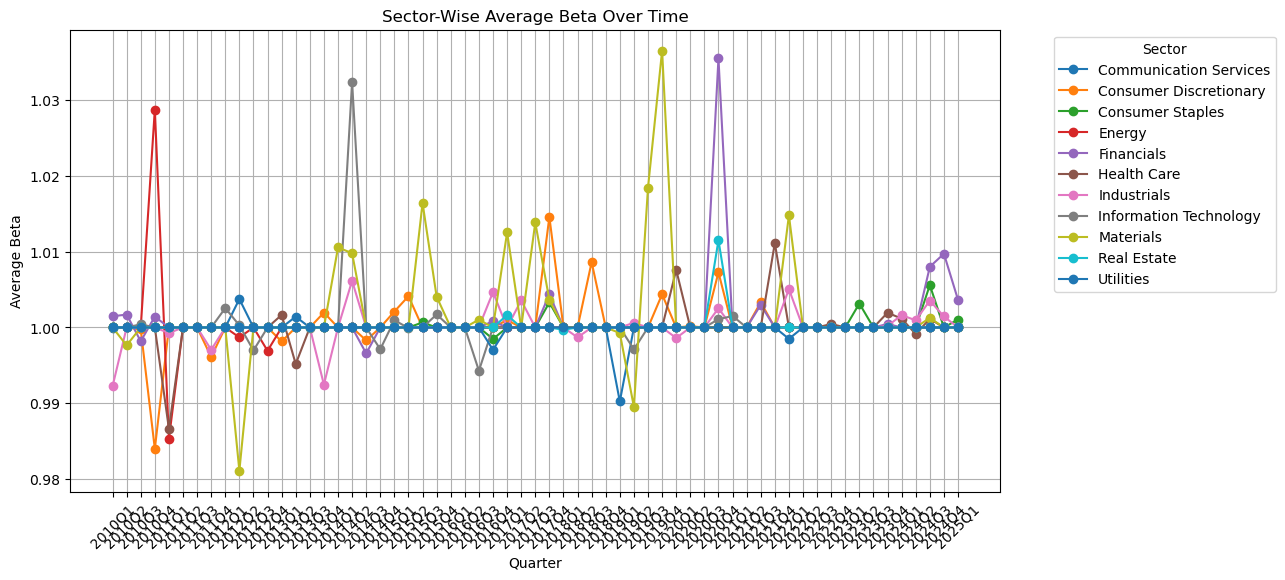

In [34]:

# Function to calculate average beta to sector index per quarter per sector
import statsmodels.api as sm

import statsmodels.api as sm

def average_sector_beta_per_quarter_by_sector(df, return_type="Daily Log Return"):
    results = []

    for (quarter, sector), df_quarter_sector in df.groupby(["quarter", "sector_name_mapped"]):
        print(f"Processing: Quarter={quarter}, Sector={sector}, Rows={len(df_quarter_sector)}")
        
        df_pivot = df_quarter_sector.pivot(index="Date", columns="Ticker", values=return_type).dropna(axis=1, how="all")

        if df_pivot.shape[1] > 1:
            sector_index_return = df_pivot.mean(axis=1)
            betas = []

            for stock in df_pivot.columns:
                y = df_pivot[stock].dropna()
                X = sector_index_return.loc[y.index].rename("SectorIndex")  # Explicit name
                
                if len(y) < 10:
                    print(f"    Skipping stock {stock}: only {len(y)} observations")
                    continue

                X = sm.add_constant(X)
                model = sm.OLS(y, X).fit()

                beta = model.params.get("SectorIndex", np.nan)  # Access by name
                betas.append(abs(beta))

            avg_beta = np.nanmean(betas)
            print(f"  → Avg Beta for {sector} in {quarter}: {avg_beta:.3f}")
            results.append({"quarter": quarter, "sector": sector, "avg_beta": avg_beta})

    return pd.DataFrame(results)

# Compute average beta per quarter per sector
df_avg_beta_by_sector = average_sector_beta_per_quarter_by_sector(df, return_type="Daily Log Return")


# Plot results for Average Beta
plt.figure(figsize=(12, 6))
for sector in df_avg_beta_by_sector["sector"].unique():
    sector_data = df_avg_beta_by_sector[df_avg_beta_by_sector["sector"] == sector]
    plt.plot(sector_data["quarter"], sector_data["avg_beta"], marker='o', linestyle='-', label=sector)

plt.xlabel("Quarter")
plt.ylabel("Average Beta")
plt.title("Sector-Wise Average Beta Over Time")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [54]:
X = df_vectors[['presentation_episodic_vector', 'assigned_quarter', 'sector_name_mapped']]

# df_quarterly_correlation_by_sector['sector_name_mapped'] = df_quarterly_correlation_by_sector['sector'].copy()

# df_quarterly_correlation_by_sector['assigned_quarter'] = df_quarterly_correlation_by_sector['quarter'].copy()
# df_quarterly_correlation_by_sector = df_quarterly_correlation_by_sector.drop(columns = ['quarter', 'sector'])
print(df_quarterly_correlation_by_sector)
X

     avg_pairwise_correlation      sector_name_mapped assigned_quarter
0                    0.237099  Communication Services           2010Q1
1                    0.310625  Consumer Discretionary           2010Q1
2                    0.335582        Consumer Staples           2010Q1
3                    0.654095                  Energy           2010Q1
4                    0.384482              Financials           2010Q1
..                        ...                     ...              ...
666                  0.290331             Industrials           2025Q1
667                  0.309750  Information Technology           2025Q1
668                  0.302123               Materials           2025Q1
669                  0.496448             Real Estate           2025Q1
670                  0.398252               Utilities           2025Q1

[671 rows x 3 columns]


,presentation_episodic_vector,assigned_quarter,sector_name_mapped
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2005Q4,Information Technology
1,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]",2006Q1,Information Technology
2,"[0, 0, 0, 0, 2, 0, 1, 0, 0, 0]",2006Q2,Information Technology
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2006Q3,Information Technology
4,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",2006Q4,Information Technology
...,...,...,...
31851,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",2024Q4,Utilities
31852,"[5, 2, 1, 1, 0, 8, 0, 0, 1, 0]",2024Q4,Financials
31853,"[1, 4, 2, 0, 0, 0, 1, 1, 0, 0]",2024Q4,Industrials
31854,"[0, 1, 0, 0, 0, 0, 0, 0, 6, 0]",2024Q4,Utilities


In [48]:
import ast
df2 = X.copy()
df1 = df_quarterly_correlation_by_sector.copy()

df2["presentation_episodic_vector"] = df2["presentation_episodic_vector"].apply(ast.literal_eval)

# Compute the mean episodic vector per (assigned_quarter, sector_name_mapped)
# df2["presentation_episodic_vector"] = df2["presentation_episodic_vector"].apply(lambda x: sum(x) / len(x))  # Compute average per row
df2_grouped = df2.groupby(["assigned_quarter", "sector_name_mapped"])["presentation_episodic_vector"].mean().reset_index()

# Merge with df1
merged_df = df1.merge(df2_grouped, on=["assigned_quarter", "sector_name_mapped"])

# Run regression
X = sm.add_constant(merged_df["presentation_episodic_vector"])  # Independent variable
y = merged_df["avg_pairwise_correlation"]  # Dependent variable

model = sm.OLS(y, X).fit()
print(model.summary())  # Display summary

                               OLS Regression Results                               
Dep. Variable:     avg_pairwise_correlation   R-squared:                       0.008
Model:                                  OLS   Adj. R-squared:                  0.007
Method:                       Least Squares   F-statistic:                     5.500
Date:                      Fri, 21 Mar 2025   Prob (F-statistic):             0.0193
Time:                              17:50:14   Log-Likelihood:                 293.11
No. Observations:                       660   AIC:                            -582.2
Df Residuals:                           658   BIC:                            -573.2
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [69]:
# df2 = X.copy()
# df1 = df_quarterly_correlation_by_sector.copy()
# df2["presentation_episodic_vector"] = df2["presentation_episodic_vector"].apply(ast.literal_eval)

len((df2["presentation_episodic_vector"].iloc[0]))

10

In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# df2["presentation_episodic_vector"] = df2["presentation_episodic_vector"].apply(ast.literal_eval)

# Ensure all vectors have the same length
max_dim = max(len(vec) for vec in df2["presentation_episodic_vector"])

# Pad vectors with zeros if they are shorter
df2["presentation_episodic_vector"] = df2["presentation_episodic_vector"].apply(lambda x: x + [0] * (max_dim - len(x)))

# Convert episodic vectors into separate columns
episodic_df = pd.DataFrame(df2["presentation_episodic_vector"].tolist(), index=df2.index)
episodic_df.columns = [f"episodic_vector_{i}" for i in range(max_dim)]

# Merge with original df2
df2_expanded = pd.concat([df2.drop(columns=["presentation_episodic_vector"]), episodic_df], axis=1)

# Aggregate each dimension separately
grouped_df2 = df2_expanded.groupby(["assigned_quarter", "sector_name_mapped"]).mean().reset_index()

# Merge with df1
merged_df = df1.merge(grouped_df2, on=["assigned_quarter", "sector_name_mapped"])
sector_dummies = pd.get_dummies(merged_df["sector_name_mapped"], prefix="sector", drop_first=True)

# Merge with predictors
# X = pd.concat([merged_df[[col for col in merged_df.columns if "episodic_vector_" in col]], sector_dummies], axis=1)

# # Define independent variables (all episodic vector dimensions)
X = merged_df[[col for col in merged_df.columns if "episodic_vector_" in col]]

X = sm.add_constant(X)
print(X)
# Dependent variable
y = merged_df["avg_pairwise_correlation"]

# Run multiple regression
model = sm.OLS(y, X).fit()
print(model.summary())

     const  episodic_vector_0  episodic_vector_1  episodic_vector_2  \
0      1.0           0.111111           0.111111           0.000000   
1      1.0           1.000000           1.222222           0.000000   
2      1.0           1.333333           3.333333           0.033333   
3      1.0           0.882353           0.941176           0.000000   
4      1.0           3.058824           0.411765           0.000000   
..     ...                ...                ...                ...   
655    1.0           0.680556           1.444444           1.569444   
656    1.0           0.365079           0.253968           0.873016   
657    1.0           0.750000           1.535714           0.464286   
658    1.0           2.258065           0.774194           0.129032   
659    1.0           1.793103           0.413793           0.551724   

     episodic_vector_3  episodic_vector_4  episodic_vector_5  \
0             0.222222           0.333333           0.111111   
1             0.138

In [80]:
# episodic_df = pd.DataFrame(df2["presentation_episodic_vector"].tolist(), index=df2.index)
# episodic_df.columns = [f"episodic_vector_{i}" for i in range(max_dim)]

# # Merge with original df2
# df2_expanded = pd.concat([df2.drop(columns=["presentation_episodic_vector"]), episodic_df], axis=1)

# # Aggregate each dimension separately at sector level
# grouped_df2 = df2_expanded.groupby(["assigned_quarter", "sector_name_mapped"]).mean().reset_index()

# # Merge with df1
# merged_df = df1.merge(grouped_df2, on=["assigned_quarter", "sector_name_mapped"])

# # Define independent variables (all episodic vector dimensions)
# episodic_vector_columns = [col for col in merged_df.columns if "episodic_vector_" in col]
# X = merged_df[episodic_vector_columns]

# # Convert sector into dummy variables (One-Hot Encoding)
# sector_dummies = pd.get_dummies(merged_df["sector_name_mapped"], prefix="sector", drop_first=True)

# # Add sector dummies to X
# X = pd.concat([X, sector_dummies], axis=1)

# # Create interaction terms for each episodic vector dimension with each sector
# interaction_terms = pd.DataFrame(index=X.index)

# for sector in sector_dummies.columns:
#     for col in episodic_vector_columns:
#         interaction_terms[f"{col}_x_{sector}"] = X[col] * sector_dummies[sector]

# # Add interaction terms to X
# X = pd.concat([X, interaction_terms], axis=1)

# # Add intercept
# X = sm.add_constant(X)

# # Dependent variable
# y = merged_df["avg_pairwise_correlation"]

# # Run multiple regression
# model = sm.OLS(y, X).fit()

# # Display regression results
# print(model.summary())

In [13]:


sector_map = {
    10: "Energy",
    15: "Materials",
    20: "Industrials",
    25: "Consumer Discretionary",
    30: "Consumer Staples",
    35: "Health Care",
    40: "Financials",
    45: "Information Technology",
    50: "Communication Services",
    55: "Utilities",
    60: "Real Estate"
}
industry_group_map = {
    1010: "Energy",
    1510: "Materials",
    2010: "Capital Goods",
    2020: "Commercial & Professional Services",
    2030: "Transportation",
    2510: "Automobiles & Components",
    2520: "Consumer Durables & Apparel",
    2530: "Consumer Services",
    2550: "Consumer Discretionary Distribution & Retail",
    3010: "Consumer Staples Distribution & Retail",
    3020: "Food, Beverage & Tobacco",
    3030: "Household & Personal Products",
    3510: "Health Care Equipment & Services",
    3520: "Pharmaceuticals, Biotechnology & Life Sciences",
    4010: "Banks",
    4020: "Financial Services",
    4030: "Insurance",
    4510: "Software & Services",       # GICS uses 4510 for the entire group,
    #  -- note that GICS also further splits 4510 into 451020, 451030 for Industries
    4510: "Software & Services",       # repeated key is typically not needed, see details below
    4520: "Technology Hardware & Equipment",
    4530: "Semiconductors & Semiconductor Equipment",
    5010: "Telecommunication Services",
    5020: "Media & Entertainment",
    5510: "Utilities",
    6010: "Equity Real Estate Investment Trusts (REITs)",
    6020: "Real Estate Management & Development"
}



industry_map = {
    # -- Sector 10: Energy
    101010: "Energy Equipment & Services",
    101020: "Oil, Gas & Consumable Fuels",
    
    # -- Sector 15: Materials
    151010: "Chemicals",
    151020: "Construction Materials",
    151030: "Containers & Packaging",
    151040: "Metals & Mining",
    151050: "Paper & Forest Products",
    
    # -- Sector 20: Industrials
    201010: "Aerospace & Defense",
    201020: "Building Products",
    201030: "Construction & Engineering",
    201040: "Electrical Equipment",
    201050: "Industrial Conglomerates",
    201060: "Machinery",
    201070: "Trading Companies & Distributors",
    202010: "Commercial Services & Supplies",
    202020: "Professional Services",
    203010: "Air Freight & Logistics",
    203020: "Passenger Airlines",
    203030: "Marine Transportation",
    203040: "Ground Transportation",
    203050: "Transportation Infrastructure",
    
    # -- Sector 25: Consumer Discretionary
    251010: "Automobile Components",
    251020: "Automobiles",
    252010: "Household Durables",
    252020: "Leisure Products",
    252030: "Textiles, Apparel & Luxury Goods",
    253010: "Hotels, Restaurants & Leisure",
    253020: "Diversified Consumer Services",
    255010: "Distributors",
    255030: "Broadline Retail",
    255040: "Specialty Retail",
    
    # -- Sector 30: Consumer Staples
    301010: "Consumer Staples Distribution & Retail",
    302010: "Beverages",
    302020: "Food Products",
    302030: "Tobacco",
    303010: "Household Products",
    303020: "Personal Care Products",
    
    # -- Sector 35: Health Care
    351010: "Health Care Equipment & Supplies",
    351020: "Health Care Providers & Services",
    351030: "Health Care Technology",
    352010: "Biotechnology",
    352020: "Pharmaceuticals",
    352030: "Life Sciences Tools & Services",
    
    # -- Sector 40: Financials
    401010: "Banks",
    402010: "Financial Services",
    402020: "Consumer Finance",
    402030: "Capital Markets",
    402040: "Mortgage REITs",
    403010: "Insurance",
    
    # -- Sector 45: Information Technology
    451020: "IT Services",
    451030: "Software",
    452010: "Communications Equipment",
    452020: "Technology Hardware, Storage & Peripherals",
    452030: "Electronic Equipment, Instruments & Components",
    453010: "Semiconductors & Semiconductor Equipment",
    
    # -- Sector 50: Communication Services
    501010: "Diversified Telecommunication Services",
    501020: "Wireless Telecommunication Services",
    502010: "Media",
    502020: "Entertainment",
    502030: "Interactive Media & Services",
    
    # -- Sector 55: Utilities
    551010: "Electric Utilities",
    551020: "Gas Utilities",
    551030: "Multi-Utilities",
    551040: "Water Utilities",
    551050: "Independent Power and Renewable Electricity Producers",
    
    # -- Sector 60: Real Estate
    601010: "Diversified REITs",
    601025: "Industrial REITs",
    601030: "Hotel & Resort REITs",
    601040: "Office REITs",
    601050: "Health Care REITs",
    601060: "Residential REITs",
    601070: "Retail REITs",
    601080: "Specialized REITs",
    602010: "Real Estate Management & Development"
}


In [14]:

subindustry_map = {
    # -- Energy (10 -> 101010, 101020)
    10101010: "Oil & Gas Drilling",
    10101020: "Oil & Gas Equipment & Services",
    10102010: "Integrated Oil & Gas",
    10102020: "Oil & Gas Exploration & Production",
    10102030: "Oil & Gas Refining & Marketing",
    10102040: "Oil & Gas Storage & Transportation",
    10102050: "Coal & Consumable Fuels",
    
    # -- Materials (15 -> e.g. 151010, 151020, 151030, 151040, 151050)
    15101010: "Commodity Chemicals",
    15101020: "Diversified Chemicals",
    15101030: "Fertilizers & Agricultural Chemicals",
    15101040: "Industrial Gases",
    15101050: "Specialty Chemicals",
    15102010: "Construction Materials",
    15103010: "Metal, Glass & Plastic Containers",
    15103020: "Paper & Plastic Packaging Products & Materials",
    15104010: "Aluminum",
    15104020: "Diversified Metals & Mining",
    15104025: "Copper",
    15104030: "Gold",
    15104040: "Precious Metals & Minerals",
    15104045: "Silver",
    15104050: "Steel",
    15105010: "Forest Products",
    15105020: "Paper Products",
    
    # -- Industrials (20 -> e.g. 20101010, 20102010, etc.)
    20101010: "Aerospace & Defense",
    20102010: "Building Products",
    20103010: "Construction & Engineering",
    20104010: "Electrical Components & Equipment",
    20104020: "Heavy Electrical Equipment",
    20105010: "Industrial Conglomerates",
    20106010: "Construction Machinery & Heavy Transportation Equipment",
    20106015: "Agricultural & Farm Machinery",
    20106020: "Industrial Machinery & Supplies & Components",
    20107010: "Trading Companies & Distributors",
    20201010: "Commercial Printing",
    20201050: "Environmental & Facilities Services",
    20201060: "Office Services & Supplies",
    20201070: "Diversified Support Services",
    20201080: "Security & Alarm Services",
    20202010: "Human Resource & Employment Services",
    20202020: "Research & Consulting Services",
    20202030: "Data Processing & Outsourced Services",
    20301010: "Air Freight & Logistics",
    20302010: "Passenger Airlines",
    20303010: "Marine Transportation",
    20304010: "Rail Transportation",
    20304030: "Cargo Ground Transportation",
    20304040: "Passenger Ground Transportation",
    20305010: "Airport Services",
    20305020: "Highways & Railtracks",
    20305030: "Marine Ports & Services",
    
    # -- Consumer Discretionary (25)
    25101010: "Automotive Parts & Equipment",
    25101020: "Tires & Rubber",
    25102010: "Automobile Manufacturers",
    25102020: "Motorcycle Manufacturers",
    25201010: "Consumer Electronics",
    25201020: "Home Furnishings",
    25201030: "Homebuilding",
    25201040: "Household Appliances",
    25201050: "Housewares & Specialties",
    25202010: "Leisure Products",
    25203010: "Apparel, Accessories & Luxury Goods",
    25203020: "Footwear",
    25203030: "Textiles",
    25301010: "Casinos & Gaming",
    25301020: "Hotels, Resorts & Cruise Lines",
    25301030: "Leisure Facilities",
    25301040: "Restaurants",
    25302010: "Education Services",
    25302020: "Specialized Consumer Services",
    25501010: "Distributors",
    25503030: "Broadline Retail",
    25504010: "Apparel Retail",
    25504020: "Computer & Electronics Retail",
    25504030: "Home Improvement Retail",
    25504040: "Other Specialty Retail",
    25504050: "Automotive Retail",
    25504060: "Homefurnishing Retail",
    
    # -- Consumer Staples (30)
    30101010: "Drug Retail",
    30101020: "Food Distributors",
    30101030: "Food Retail",
    30101040: "Consumer Staples Merchandise Retail",
    30201010: "Brewers",
    30201020: "Distillers & Vintners",
    30201030: "Soft Drinks & Non-alcoholic Beverages",
    30202010: "Agricultural Products & Services",
    30202030: "Packaged Foods & Meats",
    30203010: "Tobacco",
    30301010: "Household Products",
    30302010: "Personal Care Products",
    
    # -- Health Care (35)
    35101010: "Health Care Equipment",
    35101020: "Health Care Supplies",
    35102010: "Health Care Distributors",
    35102015: "Health Care Services",
    35102020: "Health Care Facilities",
    35102030: "Managed Health Care",
    35103010: "Health Care Technology",
    35201010: "Biotechnology",
    35202010: "Pharmaceuticals",
    35203010: "Life Sciences Tools & Services",
    
    # -- Financials (40)
    40101010: "Diversified Banks",
    40101015: "Regional Banks",
    40201020: "Diversified Financial Services",
    40201030: "Multi-Sector Holdings",
    40201040: "Specialized Finance",
    40201050: "Commercial & Residential Mortgage Finance",
    40201060: "Transaction & Payment Processing Services",
    40202010: "Consumer Finance",
    40203010: "Asset Management & Custody Banks",
    40203020: "Investment Banking & Brokerage",
    40203030: "Diversified Capital Markets",
    40203040: "Financial Exchanges & Data",
    40204010: "Mortgage REITs",
    40301010: "Insurance Broker",
    40301020: "Life & Health Insurance",
    40301030: "Multi-line Insurance",
    40301040: "Property & Casualty Insurance",
    40301050: "Reinsurance",
    
    # -- Information Technology (45)
    45102010: "IT Consulting & Other Services",
    45102030: "Internet Services & Infrastructure",
    45103010: "Application Software",
    45103020: "Systems Software",
    45201020: "Communications Equipment",
    45202030: "Technology Hardware, Storage & Peripherals",
    45203010: "Electronic Equipment & Instruments",
    45203015: "Electronic Components",
    45203020: "Electronic Manufacturing Services",
    45203030: "Technology Distributors",
    45301010: "Semiconductor Materials & Equipment",
    45301020: "Semiconductors",
    
    # -- Communication Services (50)
    50101010: "Alternative Carriers",
    50101020: "Integrated Telecommunication Services",
    50102010: "Wireless Telecommunication Services",
    50201010: "Advertising",
    50201020: "Broadcasting",
    50201030: "Cable & Satellite",
    50201040: "Publishing",
    50202010: "Movies & Entertainment",
    50202020: "Interactive Home Entertainment",
    50203010: "Interactive Media & Services",
    
    # -- Utilities (55)
    55101010: "Electric Utilities",
    55102010: "Gas Utilities",
    55103010: "Multi-Utilities",
    55104010: "Water Utilities",
    55105010: "Independent Power Producers & Energy Traders",
    55105020: "Renewable Electricity",
    
    # -- Real Estate (60)
    60101010: "Diversified REITs",
    60102510: "Industrial REITs",
    60103010: "Hotel & Resort REITs",
    60104010: "Office REITs",
    60105010: "Health Care REITs",
    60106010: "Multi-Family Residential REITs",
    60106020: "Single-Family Residential REITs",
    60107010: "Retail REITs",
    60108010: "Other Specialized REITs",
    60108020: "Self-Storage REITs",
    60108030: "Telecom Tower REITs",
    60108040: "Timber REITs",
    60108050: "Data Center REITs",
    60201010: "Diversified Real Estate Activities",
    60201020: "Real Estate Operating Companies",
    60201030: "Real Estate Development",
    60201040: "Real Estate Services"
}
